In [8]:
import torch
from torch import optim, nn
import numpy as np
from utils.loader import ScatterData, train_test_split_torch,train_test_split_torch_stratify
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, Resize, InterpolationMode, ToTensor
from models.generator import get_model
from models.training import train
from tqdm.auto import tqdm
import os
from glob import glob

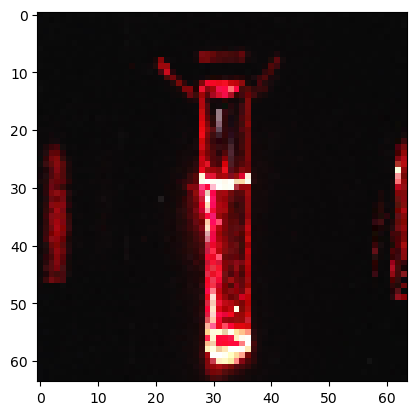

In [9]:
dset=ScatterData(path=r'C:\Users\sedau\Desktop\AIC Group\ML\HSP_ML_seda\Second Setup\635nm',
                 transform=Compose([ToTensor(),
                                    Resize([64,64],interpolation=InterpolationMode.NEAREST)]),
                 verbose=False)

train_loader,valid_loader=train_test_split_torch(dset,validation_split=0.2,shuffle_dataset=True,batch_size=5)

# visualize
(x,y)=dset[100]
x=x.permute(1,2,0).numpy()
x=x*127.5+127.5
plt.imshow(x.astype('uint'))

In [10]:
os.chdir(r'C:\Users\sedau\Desktop\AIC Group\ML\HSP_ML_seda\Second Setup\635nm')
lst=glob('*.jpg')
count=0
lst_soluble=[]
for file in lst:
    f=file.split('_')[-2]
    if f=='INSOLUBLE' : count+=1
    if f=='SOLUBLE' : lst_soluble.append(file)
print('total file : ',len(lst))
print('soluble {}% & insoluble {}%'.format(round((len(lst)-count)/len(lst)*100,3),round(count/len(lst)*100),3))

total file :  129
soluble 24.806% & insoluble 75%


In [11]:
model_resnet=get_model('resnet18',feat=64)

In [15]:
lr = 1e-3
history = train(model=model_resnet,
      optimizer=torch.optim.Adam(model_resnet.parameters(), lr=lr),
      loss_fn=nn.BCELoss(),
      train_loader=train_loader,
      valid_loader=valid_loader,
      epochs=10,
      device='cpu',
      verbose=True,
      path=r'C:\Users\sedau\Desktop\AIC Group\ML\HSP_ML_seda\weights',
      fname = 'solubility_lr_'+str(lr),
      update=1)

 10%|█         | 1/10 [00:26<04:00, 26.69s/it]

epoch: 0,train loss: 0.0017954303043481445, valid loss: 3.790859238961275e-06, train acc: 1.0, valid acc: 1.0


 20%|██        | 2/10 [00:50<03:19, 24.99s/it]

epoch: 1,train loss: 4.174856953653716e-05, valid loss: 0.0, train acc: 1.0, valid acc: 1.0


 30%|███       | 3/10 [01:12<02:46, 23.84s/it]

epoch: 2,train loss: 2.026564317247903e-06, valid loss: 0.0, train acc: 1.0, valid acc: 1.0


 40%|████      | 4/10 [01:37<02:24, 24.04s/it]

epoch: 3,train loss: 3.3974657398516683e-07, valid loss: 0.0, train acc: 1.0, valid acc: 1.0


 50%|█████     | 5/10 [02:03<02:03, 24.74s/it]

epoch: 4,train loss: 6.771173882924586e-06, valid loss: 0.0, train acc: 1.0, valid acc: 1.0


 60%|██████    | 6/10 [02:26<01:37, 24.39s/it]

epoch: 5,train loss: 3.099447795307242e-06, valid loss: 0.0, train acc: 1.0, valid acc: 1.0


 70%|███████   | 7/10 [02:57<01:18, 26.29s/it]

epoch: 6,train loss: 2.4557181497186775e-06, valid loss: 0.0, train acc: 1.0, valid acc: 1.0


 80%|████████  | 8/10 [03:26<00:54, 27.32s/it]

epoch: 7,train loss: 1.358988534150285e-06, valid loss: 0.0, train acc: 1.0, valid acc: 1.0
epoch: 8,train loss: 1.6689303450334592e-07, valid loss: 0.0, train acc: 1.0, valid acc: 1.0


100%|██████████| 10/10 [04:24<00:00, 26.40s/it]

epoch: 9,train loss: 9.059913033127032e-07, valid loss: 0.0, train acc: 1.0, valid acc: 1.0


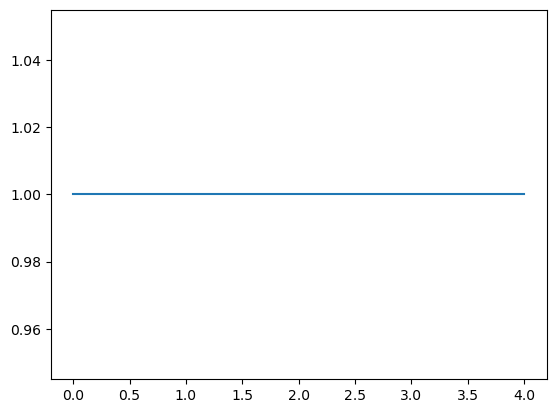

In [13]:
plt.plot(history.test_acc)

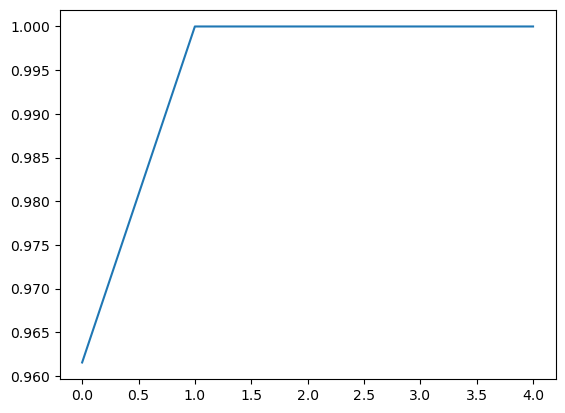

In [14]:
plt.plot(history.train_acc)